#### 과제 1 
#### 유방암 결과를 분류하는 서포트 벡터 머신 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 
#### 그리고 모델의 정확도와 confusion matrix를 구하라.
#### 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
#### -.목표변수(diagnosis : 양성(108개), 음성(benign, 212개) 

In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화, 한글폰트
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')

# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 데이터 분할 data split: train, test
from sklearn.model_selection import train_test_split
# 분류 SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

step1 데이터 구성하기

In [2]:
# 데이터 구성하기 
df_raw = pd.read_csv("D:/data/2/유방암.csv",encoding='euc-kr')
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


In [3]:
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "음성", 0, 1)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [4]:
# 데이터 구성하기 - 결측치 처리
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

<AxesSubplot:>

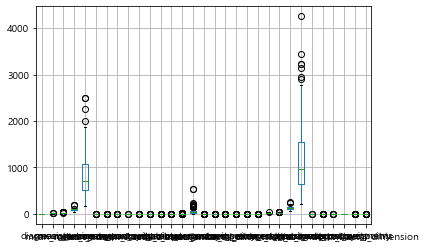

In [5]:
df_raw.boxplot()

<AxesSubplot:>

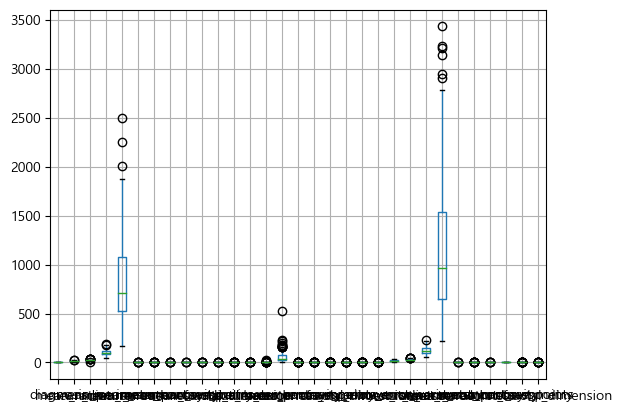

In [6]:
# 이상치 제거
df_raw = df_raw[df_raw["worst_area"] < 4000] 
df_raw.boxplot()

In [7]:
# 설명변수 설정
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False) 
# 목표변수 설정
df_raw_y=df_raw["diagnosis"] 
# 데이터 분할 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state =1234)

# 출력
print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(191, 30)
(191,)
(128, 30)
(128,)


Step2 모델 생성

In [8]:
# SVC 모델 생성 
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)
# train 데이터 셋 정확도
print('Accuracy on training set:{:.3f}'.format(svm_uncustomized.score(df_train_x,df_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set:{:.3f}'.format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.895
Accuracy on test set:0.891


SCV 모델 Parameter변경

In [9]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제(0.01,0.1,1,10)
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

# 데이터 테이블로 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

In [10]:
# C별 정확도 확인
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.634,0.703
1,0.10,0.874,0.859
2,1.00,0.895,0.891
3,10.00,0.916,0.898


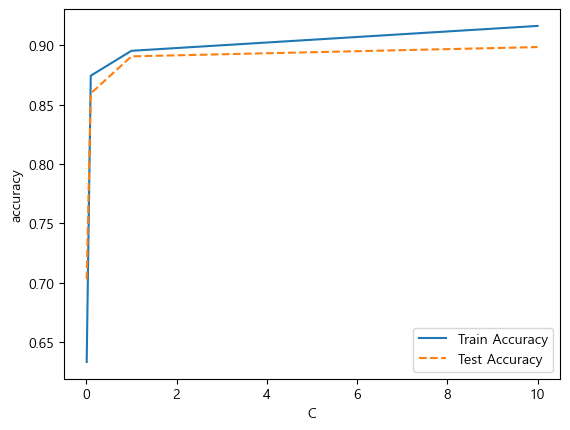

In [11]:
# 모델 정확도 그래프 확인
plt.plot(para_c,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_c,test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('C')
plt.legend()

# C 가 1초과시 train 데이터 이용한 모델의 정확도는 1(과대적합) test 정확도는 변화없음

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# gamma:규제(0.01,0.1,1,10)
para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=0.1,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

#데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] =  test_accuracy

In [13]:
# Gamma별 정확도 확인
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.6335,0.7031
1,0.10,0.6335,0.7031
2,1.00,0.6335,0.7031
3,10.00,0.6335,0.7031


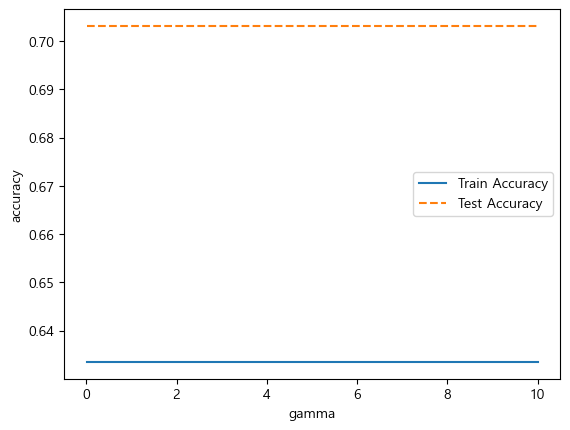

In [14]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('gamma')
plt.legend()

# gamma변화는 정확도에 영향을 미치지 않습니다.
# gamma 변화 구간을 변경하여 정확도 확인이 가능합니다.

In [15]:
# 변수명 저장
v_feature_name = df_train_x.columns

# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.149953,-0.876078,-0.157752,-0.225688,-0.742264,-0.475636,-0.548009,-0.625746,-0.994440,-0.395324,...,-0.141016,-1.153338,-0.145315,-0.217604,0.489609,0.141368,-0.089828,-0.297443,0.523224,0.508600
1,-1.321390,-2.560747,-1.339039,-1.169693,-0.238060,-1.150838,-1.147397,-1.201726,-1.770011,0.181207,...,-1.353561,-2.513007,-1.395147,-1.150902,0.253712,-1.043079,-1.157006,-1.479597,-1.387952,-0.508698
2,0.715067,-0.416843,0.622424,0.627335,-0.944508,-0.671957,-0.474086,-0.206038,-0.896129,-1.176566,...,0.554675,-0.141029,0.464843,0.464328,-0.612674,-0.364621,0.008932,0.178883,0.221763,-0.888004
3,-0.204186,-1.299058,-0.249468,-0.303785,-1.288603,-0.657758,-0.788170,-0.833302,-0.655811,-0.836775,...,-0.256964,-1.487466,-0.307078,-0.352044,-1.337522,-0.167023,-0.172207,-0.454227,-0.525399,-0.222599
4,-0.754653,-1.736540,-0.822595,-0.753437,-2.091257,-1.502637,-1.179760,-1.329211,-1.930222,-0.959322,...,-0.956585,-1.930764,-1.005213,-0.886562,-1.781009,-1.105900,-1.091946,-1.365667,-1.072067,-0.899468


In [16]:
# 데이터 분할
df_scaled_train_x,df_scaled_test_x = train_test_split(df_scaled,test_size=0.4,random_state=1234)
print("train data X size:{}".format(df_scaled_train_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size:(191, 30)
test data X size:(128, 30)


In [17]:
# scale 조절후 SVC 모델 재 실행 
# scale이 조정된 데이터로 새로운 모델 생성  
svm_scaled=SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x,df_train_y)

#train 데이터 셋 정확도
print('Accuracy on training set:{:.3f}'.format(svm_scaled.score(df_scaled_train_x, df_train_y)))

# test 데이터 셋 정확도
print('Accuracy on test set:{:.3f}'.format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set:0.990
Accuracy on test set:0.969


In [18]:
# C: 규제에 대한 강도 변경
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# C:규제(0.01,0.1,1,10)
para_c=[10**c for c in range(-2,2)]

for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))

# 데이터 테이블로 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

In [19]:
# C별 정확도 테이블 확인
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.634,0.703
1,0.10,0.953,0.914
2,1.00,0.990,0.969
3,10.00,1.000,0.969


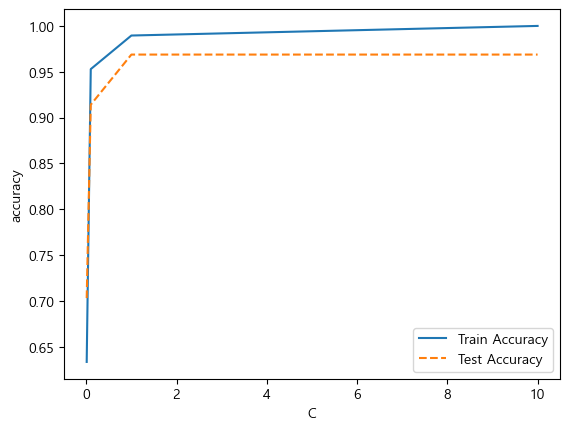

In [20]:
# 모델 정확도 그래프 확인
plt.plot(para_c,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_c,test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('C')
plt.legend()
# C=1 임의로 지정
C = 1

In [21]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]; test_accuracy=[]
# gamma:규제(0.01,0.1,1,10)
para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=1,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['TestAccuracy']=test_accuracy

In [22]:
# Gamma별 정확도 확인
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.99,0.953
1,0.10,0.99,0.938
2,1.00,1.00,0.719
3,10.00,1.00,0.711


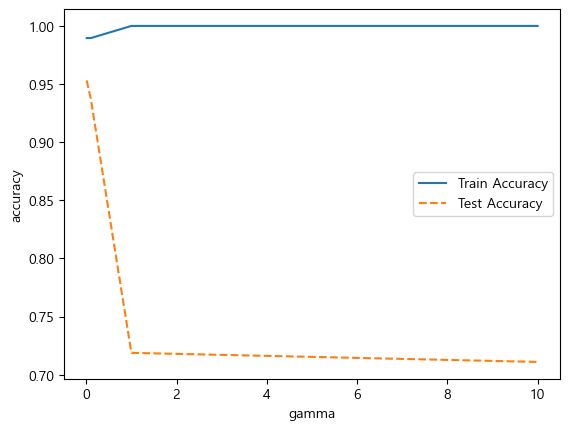

In [23]:
# Gamma별 정확도 그래프 확인
plt.plot(para_gamma,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_gamma,test_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy');plt.xlabel('gamma')
plt.legend()
# gamma=0.1 임의로 지정
gamma = 0.1

In [24]:
# 최종 모델
svc_final=SVC(gamma=0.1,C=1,random_state=1234)
svc_final.fit(df_scaled_train_x,df_train_y)
# 평가
y_pred=svc_final.predict(df_scaled_test_x)
#Train 데이터 정확도
print('Accuracy on training set:{:.3f}'.format(svc_final.score(df_scaled_train_x,df_train_y)))
# test 데이터 정확도
print('Accuracy on test set:{:.3f}'.format(svc_final.score(df_scaled_test_x,df_test_y)))
# confusion matrix
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.990
Accuracy on test set:0.938
Confusion matrix:
[[86  4]
 [ 4 34]]


In [25]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator=SVC(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid={'C':para_c,'gamma':para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_svc=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_svc.fit(df_scaled_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_svc.best_estimator_))
print("\nbest parameter:\n{}".format(grid_svc.best_params_))
print("\nbest score:\n{}".format(grid_svc.best_score_.round(3)))

best estimator model:
SVC(C=10, gamma=0.01, random_state=1234)

best parameter:
{'C': 10, 'gamma': 0.01}

best score:
0.99


In [26]:
# 예측값
df_pred = pd.DataFrame({'prediction':svc_final.predict(df_test_x)}) 
df_pred.describe()

,prediction
count,128.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [27]:
# 실제값
df_test_y.describe() 

count    128.000000
mean       0.296875
std        0.458676
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

test결과 예측값과 실제값이 비슷하므로 잘 설계된 의사결정 나무 라는것을 알수 있습니다